In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from utils import get_meta, load_data

In [2]:
db="wiki"
#db = "wiki_process_"
#db = "imdb"
mat_path = "/home/jiman/data/{}_crop/{}.mat".format(db, db)
#mat_path = "/Users/saboten/data/{}_crop/{}.mat".format(db, db)
#mat_path = "/Users/saboten/data/wiki_process.mat".format(db)
full_path, dob, gender, photo_taken, face_score, second_face_score, age\
    = get_meta(mat_path, db)
#image, gender, age, db, img_size, min_score = load_data(mat_path)

In [3]:
cols, rows = 4, 7
img_num = cols * rows
path_root = "/Users/saboten/data/{}_crop/".format(db)


def show_imgs(img_paths, rc = True):
    if rc:
        img_ids = np.random.choice(len(img_paths), img_num, replace=False)
    else:
        img_ids = [i for i in range(len(img_paths))]
        
    for i, img_id in enumerate(img_ids):
        plt.subplot(rows, cols, i + 1)
        img = cv2.imread(path_root + str(img_paths[img_id]))
        print(img.shape)
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    plt.show()

In [32]:
age_index = [i for i in range(len(age)) if age[i] == 5 and face_score[i] > 1.0]

In [33]:
print(age_index)

[24692, 42792, 48353]


(370, 371, 3)
(322, 323, 3)
(218, 217, 3)


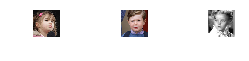

In [60]:
img_paths = []
for idx in age_index:
    img_paths.append(full_path[idx][0])
show_imgs(img_paths, rc=False)

In [12]:
#db="wiki"
#db = "wiki_process_"
#db = "imdb"
#mat_path = "/Users/saboten/data/wiki_process_60_128-tr-3.mat"
mat_path = "/home/jiman/data/wiki_process_60_8092-cv-1.mat"
#mat_path = "/Users/saboten/data/wiki_process.mat".format(db)
#full_path, dob, gender, photo_taken, face_score, second_face_score, age\
 #   = get_meta(mat_path, db)
image_p, gender_p, age_p, db_p, img_size_p, min_score_p = load_data(mat_path)

In [64]:
print(np.where(age_p == 5)[0].tolist())

[]


In [37]:
print(age_p[649],age_p[1082])

5 5


In [13]:
print(len(image_p))

329


In [49]:
image_p[649].shape

(224, 224, 3)

In [61]:
def show_processed_imgs(indexes):
    for i, img_id in enumerate(indexes):
        cols_, rows_ = 4, 7
        img_num_ = cols_ * rows_
        plt.subplot(rows_, cols_, i + 1)
        img = image_p[img_id]
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    plt.show()

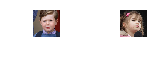

In [62]:
show_processed_imgs(np.where(age_p == 5)[0].tolist())

In [2]:
print("#images: {}".format(len(face_score)))
print("#images with inf scores: {}".format(np.isinf(face_score).sum()))
print("#images with nan gender: {}".format(np.isnan(gender).sum()))

#images: 460723
#images with inf scores: 62302
#images with nan gender: 8462


In [3]:
count = 0
for i in range(len(face_score)):
    if face_score[i] > 1.0 and 0 < age[i] < 80:
        count+=1

print("#images with scores > 1.0 and 0 < age < 100: {}".format(count))

#images with scores > 1.0 and 0 < age < 100: 385788


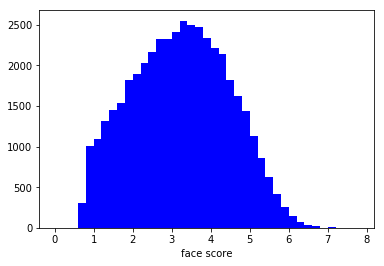

In [33]:
hist = plt.hist(face_score[face_score>0], bins=np.arange(0, 8, 0.2), color='b')
plt.xlabel("face score")

In [16]:
def number_of_multi():
    index = []
    for i in range(len(face_score)):
        if face_score[i]*0.8 < second_face_score[i]:
            index.append(i)
    return index

multi_face_index = number_of_multi()
print("#images with second face scores higher than first scores/2: {}".format(len(multi_face_index)))

#images with second face scores higher than first scores/2: 1349


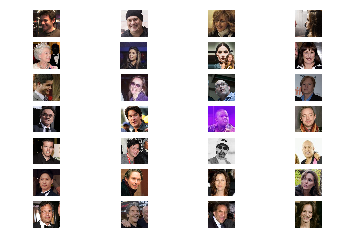

In [5]:
img_paths = []
for i in range(len(face_score)):
    if np.isnan(gender[i]) and face_score[i] > 1.0:
        img_paths.append(full_path[i][0])
show_imgs(img_paths)

212674


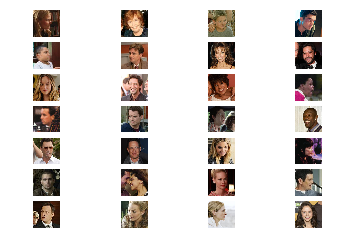

In [8]:
img_paths = []
for i in range(len(face_score)):
    if ((~np.isnan(second_face_score[i])) and second_face_score[i] > 0.0) and face_score[i]>1.0 and 0<age[i]<100:
        img_paths.append(full_path[i][0])
print(len(img_paths))
show_imgs(img_paths)

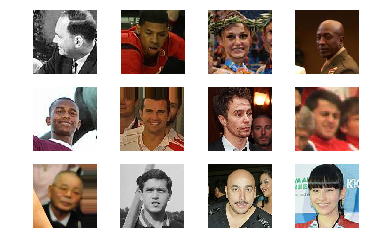

In [18]:
img_paths = []

for idx in multi_face_index:
    img_paths.append(full_path[idx][0])

show_imgs(img_paths)

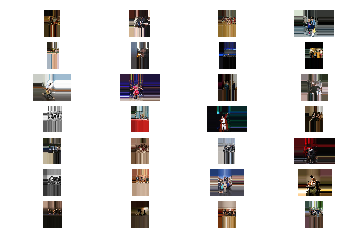

In [9]:
img_paths = []

for i in range(len(face_score)):
    if np.isinf(face_score[i]):
        img_paths.append(full_path[i][0])

show_imgs(img_paths)

In [10]:
print("#images with second face scores: {}".format((~np.isnan(second_face_score)).sum()))

#images with second face scores: 213797


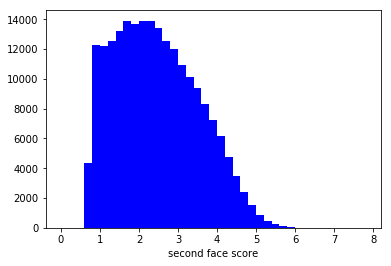

In [11]:
hist = plt.hist(second_face_score[~np.isnan(second_face_score)], bins=np.arange(0, 8, 0.2), color='b')
plt.xlabel("second face score")

In [12]:
img_paths = []

for i in range(len(face_score)):
    if face_score[i] < 0.0:
        img_paths.append(full_path[i][0])

print("#images with scores lower than 0.0: {}".format(len(img_paths)))

#images with scores lower than 0.0: 62302


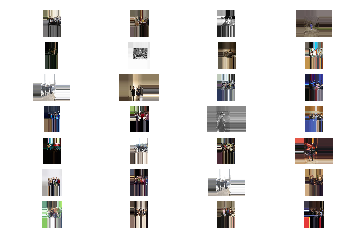

In [13]:
show_imgs(img_paths)

In [14]:
img_paths = []

for i in range(len(face_score)):
    if 0.0 < face_score[i] < 1.0:
        img_paths.append(full_path[i][0])

print("#images with scores lower than 1.0: {}".format(len(img_paths)))

#images with scores lower than 1.0: 10645


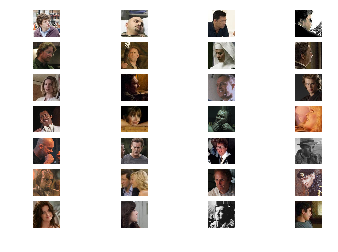

In [15]:
show_imgs(img_paths)

In [16]:
img_paths = []

for i in range(len(face_score)):
    if age[i] > 100:
        img_paths.append(full_path[i][0])

print("#images with ages greater than 100: {}".format(len(img_paths)))

#images with ages greater than 100: 159


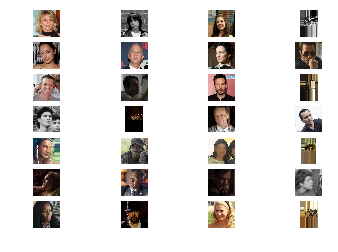

In [17]:
show_imgs(img_paths)

2731


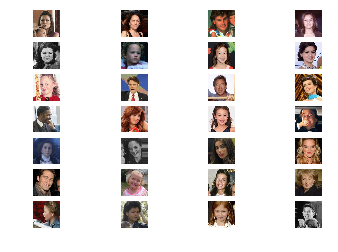

In [18]:
img_paths = []

for i in range(len(face_score)):
    if age[i] < 10 and face_score[i] > 1.0:
        img_paths.append(full_path[i][0])

print(len(img_paths))
show_imgs(img_paths)

In [19]:
age_dist = {}

for j in range(100):
    count = 0
    for i in range(len(face_score)):
        if j <= age[i] < j+1 and face_score[i] > 1.0:
            count+=1
    age_dist['age%s' % j] = count

for key, value in age_dist.items():
    print('%s: %s' % (key, value))

age0: 21
age1: 115
age2: 121
age3: 44
age4: 58
age5: 179
age6: 199
age7: 397
age8: 539
age9: 735
age10: 878
age11: 1356
age12: 1414
age13: 1917
age14: 1814
age15: 2187
age16: 2398
age17: 2915
age18: 3575
age19: 4790
age20: 6473
age21: 7089
age22: 7346
age23: 8311
age24: 9732
age25: 10340
age26: 11070
age27: 10780
age28: 11658
age29: 12492
age30: 13815
age31: 13732
age32: 13208
age33: 12822
age34: 12567
age35: 12782
age36: 12901
age37: 12122
age38: 12255
age39: 11820
age40: 9596
age41: 10179
age42: 9310
age43: 8858
age44: 7949
age45: 8708
age46: 7164
age47: 6418
age48: 5853
age49: 5328
age50: 4971
age51: 4845
age52: 4237
age53: 3656
age54: 3699
age55: 3056
age56: 2826
age57: 2752
age58: 2845
age59: 2839
age60: 2399
age61: 2029
age62: 1876
age63: 1968
age64: 1628
age65: 1615
age66: 1175
age67: 1231
age68: 1022
age69: 1079
age70: 923
age71: 767
age72: 689
age73: 621
age74: 513
age75: 527
age76: 527
age77: 435
age78: 332
age79: 397
age80: 242
age81: 250
age82: 183
age83: 152
age84: 175
age

In [30]:
img_paths = []

for i in range(len(face_score)):
    if age[i] < 0.0:
        img_paths.append(full_path[i][0])

print("#images with scores lower than 0.0: {}".format(len(img_paths)))

#images with scores lower than 0.0: 1288


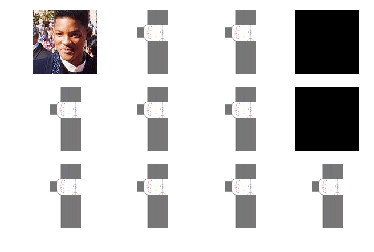

In [31]:
show_imgs(img_paths)